In [77]:
import numpy as np 
import tensorflow as tf
import tensorflow_datasets as tfds

In [78]:
print(tfds.list_builders())

['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset', 'ai2_arc', 'ai2_arc_with_ir', 'amazon_us_reviews', 'anli', 'answer_equivalence', 'arc', 'asqa', 'asset', 'assin2', 'bair_robot_pushing_small', 'bccd', 'beans', 'bee_dataset', 'beir', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'ble_wind_field', 'blimp', 'booksum', 'bool_q', 'bucc', 'c4', 'c4_wsrs', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'cardiotox', 'cars196', 'cassava', 'cats_vs_dogs', 'celeb_a', 'celeb_a_hq', 'cfq', 'cherry_blossoms', 'chexpert', 'cifar10', 'cifar100', 'cifar100_n', 'cifar10_1', 'cifar10_corrupted', 'cifar10_n', 'citrus_leaves', 'cityscapes', 'civil_comments', 'clevr', 'clic', 'clinc_oos', 'cmaterdb', 'cnn_dailymail', 'coco', 'coco_captions', 'coil100', 'colorectal_histology', 'colorectal_histology_large', 'common_voice', 'conll2002', 'conll2003', 'controlled_noisy_web_labels', 'coqa', 'cos_e', 'cosmos_qa', 'covid19', 'covid19sum', 'crema_d

In [79]:
data, info = tfds.load('mnist', with_info=True)
print(info)

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='C:\\Users\\euiso\\tensorflow_datasets\\mnist\\3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)

In [80]:
train = data['train']
print(len(train))

train = train.map(lambda x :(x['image'], x['label']))
train = train.shuffle(10000).batch(50000)
batch = next(iter(train))
print(batch[0].shape, batch[1].shape)

train_images, train_labels = batch
print(train_images.shape, train_labels.shape)
print(type(train_images), type(train_labels))

60000
(50000, 28, 28, 1) (50000,)
(50000, 28, 28, 1) (50000,)
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>


In [81]:
test = data['test']
print(len(test))

test = test.map(lambda x :(x['image'], x['label']))
test = test.shuffle(10000).batch(50000)
batch = next(iter(train))
print(batch[0].shape, batch[1].shape)

test_images, test_labels = batch
print(test_images.shape, test_labels.shape)

10000
(50000, 28, 28, 1) (50000,)
(50000, 28, 28, 1) (50000,)


[29166  4127 10163 41423 21710 27240 34651 48140  1508 47691 18050 23276
 47003  1814 29279 28787]


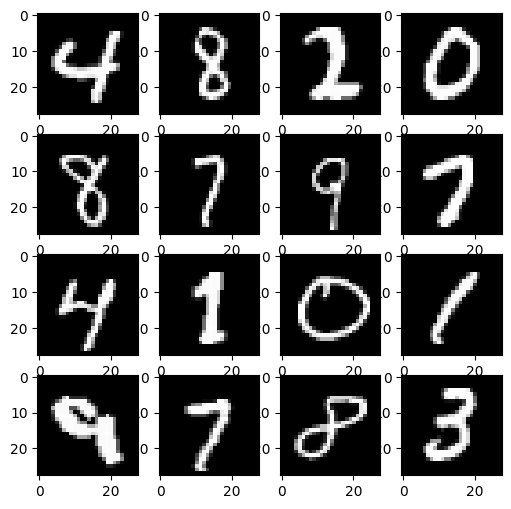

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))

random_idx = np.random.randint(0, len(train_images), size=16)
print(random_idx)

for i, idx in enumerate(random_idx): 

    img = train_images[idx]
    label = train_labels[idx]

    plt.subplot(4, 4, i+1)
    plt.imshow(img, cmap='gray')
    # plt.title(lab

plt.show()

In [83]:
from tensorflow.keras.utils import to_categorical

train_images = tf.cast(train_images, tf.float32) / 255.0
test_images = tf.cast(test_images, tf.float32) / 255.0

# train_images = train_images/ 255.0
# test_images = test_images/ 255.0

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [84]:
from ast import mod
from pyexpat import model
from numpy import ModuleDeprecationWarning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(63, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_24 (Dropout)        (None, 13, 13, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 dropout_25 (Dropout)        (None, 5, 5, 64)         

In [85]:
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping, ReduceLROnPlateau
cp = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='auto')
tb = TensorBoard(log_dir='logs', histogram_freq=0, write_graph=True, write_images=True, update_freq='epoch', embeddings_freq=1)
es = EarlyStopping(monitor='val_loss', patience=10, mode='auto', verbose=1)
rl = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, mode='auto')

In [86]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(train_images, train_labels, epochs=100, batch_size=32, validation_split=0.2, callbacks=[cp, tb, es, rl])

Epoch 1/100
1250/1250 [==============================] - 17s 13ms/step - loss: 0.6081 - acc: 0.8036 - val_loss: 0.1249 - val_acc: 0.9636 - lr: 0.0010
Epoch 2/100
1250/1250 [==============================] - 16s 13ms/step - loss: 0.2024 - acc: 0.9485 - val_loss: 0.0877 - val_acc: 0.9753 - lr: 0.0010
Epoch 3/100
1250/1250 [==============================] - 16s 13ms/step - loss: 0.1465 - acc: 0.9643 - val_loss: 0.0893 - val_acc: 0.9761 - lr: 0.0010
Epoch 4/100
1250/1250 [==============================] - 16s 13ms/step - loss: 0.1264 - acc: 0.9688 - val_loss: 0.0729 - val_acc: 0.9818 - lr: 0.0010
Epoch 5/100
1250/1250 [==============================] - 16s 13ms/step - loss: 0.1120 - acc: 0.9727 - val_loss: 0.0663 - val_acc: 0.9836 - lr: 0.0010
Epoch 6/100
1250/1250 [==============================] - 17s 13ms/step - loss: 0.0976 - acc: 0.9760 - val_loss: 0.0627 - val_acc: 0.9843 - lr: 0.0010
Epoch 7/100
1250/1250 [==============================] - 17s 13ms/step - loss: 0.0895 - acc: 0.9783 

In [87]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc', 'lr'])

In [88]:
model.evaluate(test_images, test_labels, verbose=2)

1563/1563 - 5s - loss: 0.0160 - acc: 0.9964 - 5s/epoch - 3ms/step


[0.015968013554811478, 0.9964399933815002]

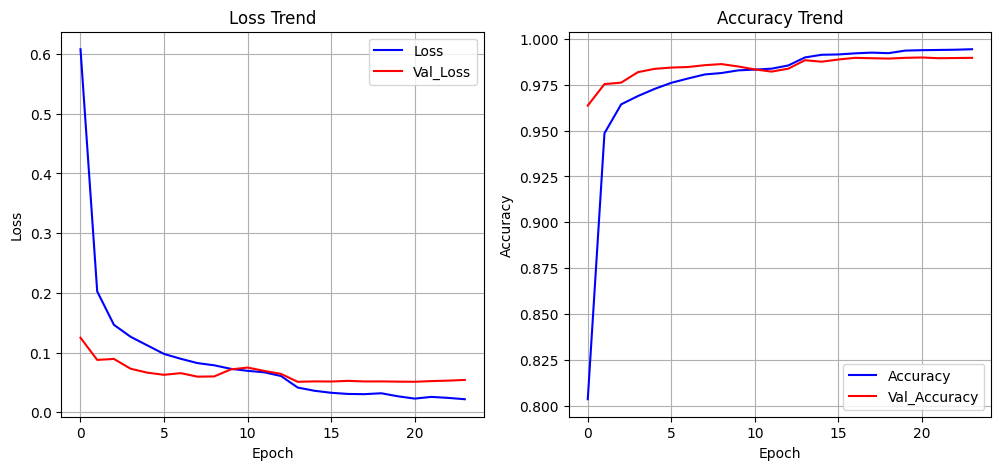

In [89]:
from turtle import color


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss', color='blue' )
plt.plot(history.history['val_loss'], label='Val_Loss', color='red')
plt.title('Loss Trend')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='Accuracy', color='blue')
plt.plot(history.history['val_acc'], label='Val_Accuracy', color='red')
plt.title('Accuracy Trend')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.show()

In [91]:
pred_ys =model.predict(test_images)
print(pred_ys.shape)
print(pred_ys[0])
print(np.argmax(pred_ys[0]))

1563/1563 [==============================] - 5s 3ms/step
(50000, 10)
[1.2096863e-30 5.2729904e-30 1.0000000e+00 4.8836207e-17 3.0775655e-28
 1.6506361e-28 1.9465684e-32 6.5285964e-19 6.4168048e-24 7.9798754e-31]
2


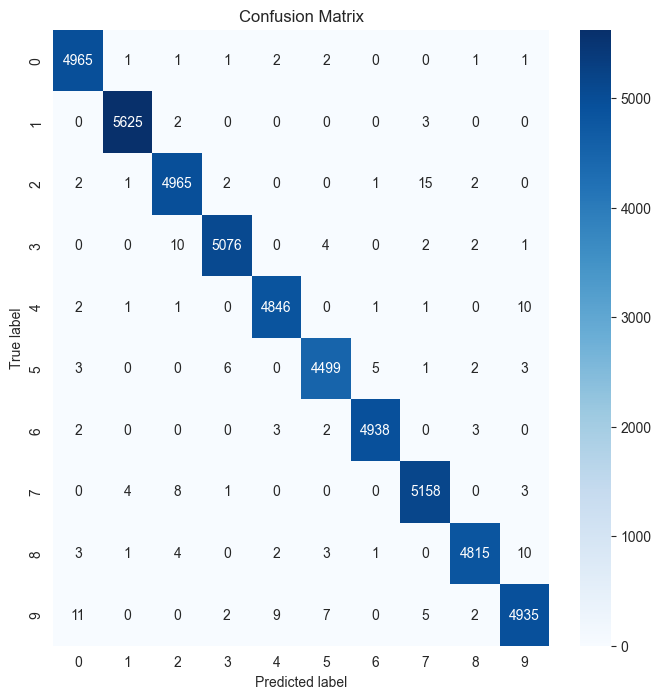

In [93]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(8, 8))
cm =confusion_matrix(np.argmax(test_labels, axis= -1), np.argmax(pred_ys, axis= -1))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()